# Import Statements


In [1]:
from tensorflow.keras.layers import Input,Dense,Flatten, Dropout
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import cv2
import shutil
import random

2022-11-08 04:41:32.694516: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


# Directory Creation

In [2]:
# creating directory 
os.mkdir('./level')
os.mkdir('./level/training')
os.mkdir('./level/training/imgaug-minor')
os.mkdir('./level/training/imgaug-moderate')
os.mkdir('./level/training/imgaug-severe')

os.mkdir('./level/Main')
os.mkdir('./level/Main/real-minor')
os.mkdir('./level/Main/real-moderate')
os.mkdir('./level/Main/real-severe')

os.mkdir('./level/validation')
os.mkdir('./level/validation/imgaug-minor')
os.mkdir('./level/validation/imgaug-moderate')
os.mkdir('./level/validation/imgaug-severe')

os.mkdir('./level/Augment')
os.mkdir('./level/Augment/imgaug-minor')
os.mkdir('./level/Augment/imgaug-moderate')
os.mkdir('./level/Augment/imgaug-severe')

# Merging Dataset

In [3]:
path_minor = "../input/car-damage/Car damage/level/training/01-minor"
dir_list_mi = os.listdir(path_minor)
path_moderate = '../input/car-damage/Car damage/level/training/02-moderate' 
dir_list_mo = os.listdir(path_moderate)
path_severe = '../input/car-damage/Car damage/level/training/03-severe' 
dir_list_s = os.listdir(path_severe)

for j in dir_list_mi:
    IMAGE_PATH = path_minor+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './level/Main/real-minor'
    cv2.imwrite(os.path.join(path,j), image)
    
for j in dir_list_mo:
    IMAGE_PATH = path_moderate+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './level/Main/real-moderate'
    cv2.imwrite(os.path.join(path,j), image)
    
for j in dir_list_s:
    IMAGE_PATH = path_severe+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './level/Main/real-severe'
    cv2.imwrite(os.path.join(path,j), image)

In [4]:
path_minorv = "../input/car-damage/Car damage/level/validation/01-minor"
dir_list_miv = os.listdir(path_minorv)
path_moderatev = '../input/car-damage/Car damage/level/validation/02-moderate' 
dir_list_mov = os.listdir(path_moderatev)
path_severev = '../input/car-damage/Car damage/level/validation/03-severe' 
dir_list_sv = os.listdir(path_severev)

for j in dir_list_miv:
    IMAGE_PATH = path_minorv+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './level/Main/real-minor'
    cv2.imwrite(os.path.join(path,j), image)
    
for j in dir_list_mov:
    IMAGE_PATH = path_moderatev+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './level/Main/real-moderate'
    cv2.imwrite(os.path.join(path,j), image)
    
for j in dir_list_sv:
    IMAGE_PATH = path_severev+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './level/Main/real-severe'
    cv2.imwrite(os.path.join(path,j), image)

# **Image Augmentation**

In [5]:
#Augmenting and saving train level minor view images

OUTPUT_DIRECTORY = './level/Augment/imgaug-minor'

# Get the list of all files and directories
path_minor = "./level/Main/real-minor"
dir_list = os.listdir(path_minor)
for j in dir_list:
    IMAGE_PATH = path_minor+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './level/Augment/imgaug-minor'
    cv2.imwrite(os.path.join(path,j), image)
    
    image = load_img(IMAGE_PATH)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) 

    datagen_shift = ImageDataGenerator(height_shift_range=0.2, width_shift_range=0.2)
    PREFIX = 'Shifted'
    imGen = datagen_shift.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(6):
        batch = imGen.next()

    datagen_rot = ImageDataGenerator(rotation_range=30)
    PREFIX = 'Rotated'
    imGen = datagen_rot.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(6):
        batch = imGen.next()

    datagen_hf = ImageDataGenerator(horizontal_flip=True)
    PREFIX = 'Hortizonal_flip'
    imGen = datagen_hf.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(1):
        batch = imGen.next()


In [6]:
#Augmenting and saving train level moderate view images

OUTPUT_DIRECTORY = './level/Augment/imgaug-moderate'

# Get the list of all files and directories
path_mod = "./level/Main/real-moderate"
dir_list = os.listdir(path_mod)
for j in dir_list:
    IMAGE_PATH = path_mod+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './level/Augment/imgaug-moderate'
    cv2.imwrite(os.path.join(path,j), image)
    
    image = load_img(IMAGE_PATH)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) 

    datagen_shift = ImageDataGenerator(height_shift_range=0.2, width_shift_range=0.2)
    PREFIX = 'Shifted'
    imGen = datagen_shift.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(6):
        batch = imGen.next()

    datagen_rot = ImageDataGenerator(rotation_range=30)
    PREFIX = 'Rotated'
    imGen = datagen_rot.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(6):
        batch = imGen.next()

    datagen_hf = ImageDataGenerator(horizontal_flip=True)
    PREFIX = 'Hortizonal_flip'
    imGen = datagen_hf.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(1):
        batch = imGen.next()


In [7]:
#Augmenting and saving train level severe view images

OUTPUT_DIRECTORY = './level/Augment/imgaug-severe'

# Get the list of all files and directories
path_sev = "./level/Main/real-severe"
dir_list = os.listdir(path_sev)
for j in dir_list:
    IMAGE_PATH = path_sev+'/'+j
    
    image = cv2.imread(IMAGE_PATH)
    path = './level/Augment/imgaug-side'
    cv2.imwrite(os.path.join(path,j), image)
    
    image = load_img(IMAGE_PATH)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) 

    datagen_shift = ImageDataGenerator(height_shift_range=0.2, width_shift_range=0.2)
    PREFIX = 'Shifted'
    imGen = datagen_shift.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(6):
        batch = imGen.next()

    datagen_rot = ImageDataGenerator(rotation_range=30)
    PREFIX = 'Rotated'
    imGen = datagen_rot.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(6):
        batch = imGen.next()

    datagen_hf = ImageDataGenerator(horizontal_flip=True)
    PREFIX = 'Hortizonal_flip'
    imGen = datagen_hf.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY, 
                        save_prefix=PREFIX, save_format='jpg')
    for i in range(1):
        batch = imGen.next()


# Split Dataset

In [8]:
# Split the minor level data in 80:20 ratio
no_of_minor = os.listdir('./level/Augment/imgaug-minor')
len(no_of_minor)
augment_data =  './level/Augment/imgaug-minor'
for f in no_of_minor:
    if random.random() > 0.80:
        shutil.move(f'{augment_data}/{f}','./level/validation/imgaug-minor' )
    else:
        shutil.move(f'{augment_data}/{f}','./level/training/imgaug-minor')

In [9]:
# Split the moderate level data in 80:20 ratio
no_of_mod = os.listdir('./level/Augment/imgaug-moderate')

augment_data =  './level/Augment/imgaug-moderate'
for f in no_of_mod:
    if random.random() > 0.80:
        shutil.move(f'{augment_data}/{f}','./level/validation/imgaug-moderate' )
    else:
        shutil.move(f'{augment_data}/{f}','./level/training/imgaug-moderate')

In [10]:
# Split the severe level data in 80:20 ratio
no_of_sev = os.listdir('./level/Augment/imgaug-severe')

augment_data =  './level/Augment/imgaug-severe'
for f in no_of_sev:
    if random.random() > 0.80:
        shutil.move(f'{augment_data}/{f}','./level/validation/imgaug-severe' )
    else:
        shutil.move(f'{augment_data}/{f}','./level/training/imgaug-severe')

# Flow from Directory - Augmentation

In [11]:
img_size = [224,224] #List which stores the resolution
main_train = './level/training' #Stores the path of the train directory
main_test = './level/validation' #Stores the path of the test directory

In [12]:
#ImageDataGenerator is used to modify the train and test images w.r.t the properties mentioned
train_datagen = ImageDataGenerator(rescale = 1/255.0)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

# flow_from_directory() is used to convert all the images in the specific directory
training_set = train_datagen.flow_from_directory(directory = main_train,
                                                 target_size = (224,224),
                                                 batch_size = 100,
                                                 )

test_set = test_datagen.flow_from_directory(directory = main_test,
                                                 target_size = (224,224),
                                                 batch_size = 100,
                                                 )

Found 9917 images belonging to 3 classes.
Found 2479 images belonging to 3 classes.


In [13]:
# Class_indices will display the respective class value
training_set.class_indices

{'imgaug-minor': 0, 'imgaug-moderate': 1, 'imgaug-severe': 2}

# Model Buiding

In [14]:
vgg_model = VGG16(include_top=False,
    weights="imagenet",
    input_shape=img_size + [3])

# Loading the VGG16 pre trained model

# include_top - this specifies whether the final layer before the output layer has to be include 
# or not. If included then there will be 1000 number of classes at the output.

# Weights are trained using imagenet

2022-11-08 04:44:11.382865: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-08 04:44:11.386532: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-08 04:44:11.452149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 04:44:11.453108: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-11-08 04:44:11.453202: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-11-08 04:44:11.483393: I tensorflow/stream_executor/platform/def

58892288/58889256 [==============================] - 0s 0us/step


In [15]:
# To print the hidden layer summary of vgg model without top layer
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
# To fix the weights of the pre trained model
for lay in vgg_model.layers:
    lay.trainable = False

In [17]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
# to list out number of folders in train and test folder
import os
folders_train1 = os.listdir(main_train)
print(len(folders_train1))

folders_test1 = os.listdir(main_test)
print(len(folders_test1))

3
3


In [19]:
#outputs the last layer
vgg_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [20]:
#inputs of the layer
vgg_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [21]:
# Flatten() is used to convert the last layer to vector or as fully connected
x = Flatten(name="first_flatten")(vgg_model.output)
# Dense() layer is added such that it outputs only two classess 
# Softmax activation layer produces probabilities for different classess.
x = Dropout(0.5)(x)
pred = Dense(3,activation='softmax')(x)
# Model() is used to group layers
model = Model(inputs=vgg_model.input,outputs=pred)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# **Model Fit**

In [22]:
# Loss function is used to find the errors or deviations in learning process
# Optimizer is used to optimize the input weights
# Metrics is used to measure the performance
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'])

In [23]:
#fit() is used to train the model
mod = model.fit( training_set, 
                validation_data=test_set, 
                epochs=8, 
                steps_per_epoch=len(training_set), 
                validation_steps=len(test_set) 
               )

2022-11-08 04:44:15.166191: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-11-08 04:44:15.170971: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000134999 Hz


Epoch 1/8


2022-11-08 04:44:15.773101: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-11-08 04:44:16.735075: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-11-08 04:44:16.769753: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


100/100 [==============================] - 59s 445ms/step - loss: 1.2741 - accuracy: 0.5368 - val_loss: 0.5413 - val_accuracy: 0.7882
Epoch 2/8
100/100 [==============================] - 38s 376ms/step - loss: 0.5157 - accuracy: 0.7891 - val_loss: 0.4553 - val_accuracy: 0.8209
Epoch 3/8
100/100 [==============================] - 37s 370ms/step - loss: 0.3666 - accuracy: 0.8547 - val_loss: 0.3729 - val_accuracy: 0.8661
Epoch 4/8
100/100 [==============================] - 38s 376ms/step - loss: 0.3082 - accuracy: 0.8837 - val_loss: 0.3692 - val_accuracy: 0.8580
Epoch 5/8
100/100 [==============================] - 37s 373ms/step - loss: 0.2678 - accuracy: 0.9017 - val_loss: 0.3201 - val_accuracy: 0.8778
Epoch 6/8
100/100 [==============================] - 37s 373ms/step - loss: 0.2278 - accuracy: 0.9215 - val_loss: 0.3148 - val_accuracy: 0.8830
Epoch 7/8
100/100 [==============================] - 38s 380ms/step - loss: 0.2161 - accuracy: 0.9271 - val_loss: 0.3125 - val_accuracy: 0.8818
Ep

# Saving the Model

In [24]:
# To save the particular model in .h5 format
import tensorflow as tf
from tensorflow.keras.models import load_model
model.save('vggmodelfinalbody.h5') 

# Visualization

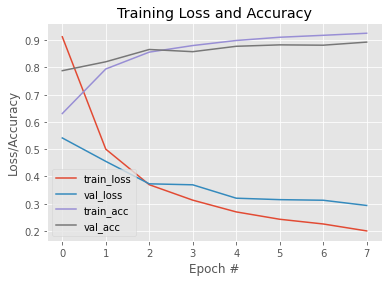

In [25]:
from matplotlib import pyplot as plt
N = 8
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), mod.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), mod.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), mod.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), mod.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('grp.png')

# Model Testing

[[9.7984087e-01 2.0152733e-02 6.4093265e-06]]
Minor


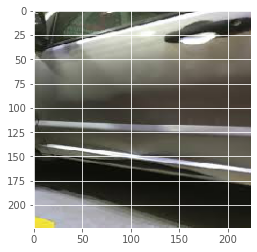

In [26]:
from tensorflow.keras.preprocessing import image
img12 =image.load_img('../input/car-damage/Car damage/level/validation/01-minor/0010.JPEG',target_size=(224,224))
plt.imshow(img12)
img12 = image.img_to_array(img12)
img12 = img12/255.0
img12 = np.expand_dims(img12,axis=0)
pred1 = model.predict(img12)
print(pred1)
pred1 = np.argmax(pred1,axis=1)



if pred1[0] == 1:
    print("Moderate")
elif pred1[0] == 0:
    print("Minor")
else:
    print("Severe")

[[5.6228073e-06 9.9389392e-01 6.1004474e-03]]
Moderate


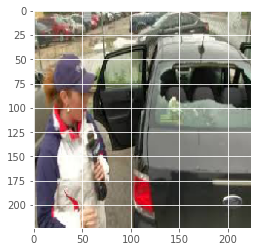

In [27]:
img12 =image.load_img('../input/car-damage/Car damage/level/validation/02-moderate/0006.JPEG',target_size=(224,224))
plt.imshow(img12)
img12 = image.img_to_array(img12)
img12 = img12/255.0
img12 = np.expand_dims(img12,axis=0)
pred1 = model.predict(img12)
print(pred1)
pred1 = np.argmax(pred1,axis=1)



if pred1[0] == 1:
    print("Moderate")
elif pred1[0] == 0:
    print("Minor")
else:
    print("Severe")

[[1.463986e-05 6.090348e-03 9.938950e-01]]
Severe


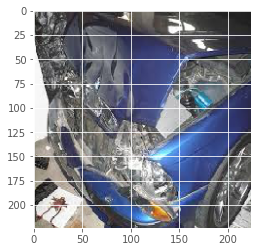

In [28]:
img12 =image.load_img('../input/car-damage/Car damage/level/validation/03-severe/0009.JPEG',target_size=(224,224))
plt.imshow(img12)
img12 = image.img_to_array(img12)
img12 = img12/255.0
img12 = np.expand_dims(img12,axis=0)
pred1 = model.predict(img12)
print(pred1)
pred1 = np.argmax(pred1,axis=1)


if pred1[0] == 1:
    print("Moderate")
elif pred1[0] == 0:
    print("Minor")
else:
    print("Severe")